# Loan Default Analysis and Prediction


In [1]:
# We import the libraries we will need.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as plt1
import seaborn as sns
import scipy.stats as st
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
#pd.set_option("max_rows",None)

plt.rcParams['figure.figsize'] = [10,7]

# Print multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import library to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle
# Dataset owner - Gaurav Dutta
# Date created - 2020-07-30
# The Problem Statement - To know which client is more likely to default

In [3]:
# We'll load the data set and create an object for it
df = pd.read_csv("application_data.csv")

In [4]:
# We take a look at the data and try to get an initial sense for it
print(f'The number of rows and columns is {df.shape}')
# Check that there are no duplicate loan applications 
print(f"The number of unique loans is: {df.SK_ID_CURR.unique().shape}")
pd.set_option('display.max_columns', None)
df.head()
pd.reset_option("max_columns")
# Show all column names their Dtypes and count of non-null values
df.info(verbose=True,null_counts=True)

The number of rows and columns is (307511, 122)
The number of unique loans is: (307511,)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# EDA, Data Cleaning and Preparation
## Feature space reduction

In [5]:
# We see significant variability in the number of values for each column from above
# Let's see the Percentage of null values in each column
percentNull = df.isnull().sum()*100 /len(df)
# We see a list of the top 45 columns with Null values
percentNull.sort_values(ascending = False).head(45)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
# Create an object of all the columns having null values that occupy more than 40% of the records
top_null_columns = percentNull[percentNull > 40].index
top_null_columns
# Now we will remove those columns from the dataframe
df.drop(top_null_columns, axis=1, inplace=True)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

#
I went through the documentation of each column and removed those columns which would either likely not have significant impact, skew the model, or are features that are less likely to be normaly available at the time of application.

In [7]:
# We will also remove the "Flag_Document" columns since they have no meaning for us
col = list(df.columns)
flag = []
for i in col:
    # The .+ symbol is used in place of * symbol (wild card)
    if re.search("FLAG_DOCUMENT.+", i): 
        flag.append(i)
df.drop(flag, axis=1, inplace=True)
# We will drop other unnecessary columns that will likely not be usefull, overcomplicate,
# and potentially cause over fitting of the model due to a complex feature space.
df.drop([
"EXT_SOURCE_3","EXT_SOURCE_2","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","DAYS_REGISTRATION","DAYS_ID_PUBLISH",
"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE",
    "LIVE_CITY_NOT_WORK_CITY","HOUR_APPR_PROCESS_START","NAME_TYPE_SUITE","SK_ID_CURR"], inplace=True, axis=1)

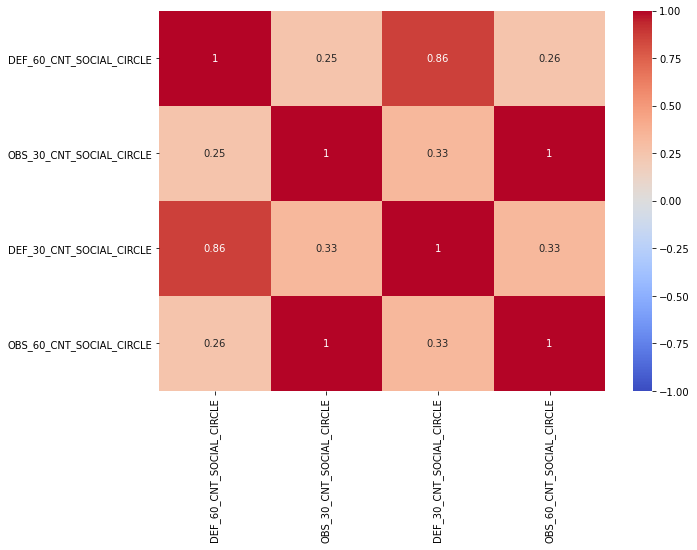

In [8]:
# Lets explore the social_circle columns to see if we need them all
Social = df[["DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]]
# Plot corelation of these columns
sns.heatmap(Social.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

In [9]:
# After seeing the corelations above we will drop unecessary columns
df.drop(["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)

<AxesSubplot:>

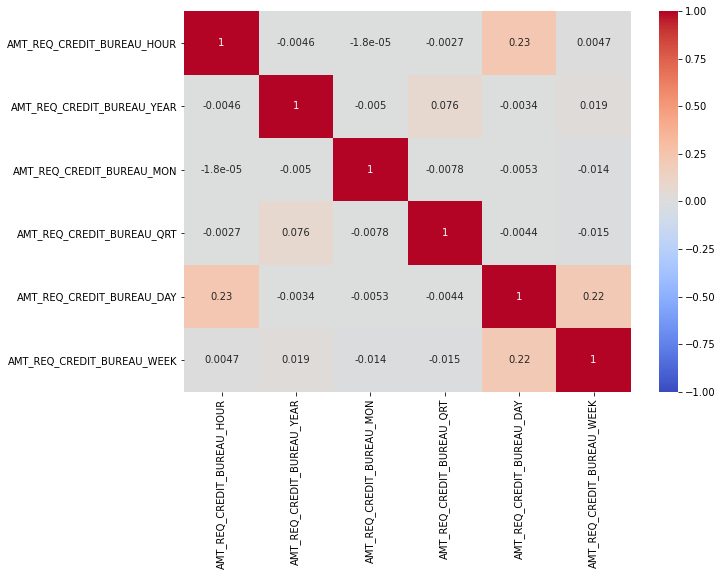

In [10]:
# Must we keep all of the Bureau columns?
# Plotting a corelation matrix for the Bureau columns 
Bureau = df[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK"]]
sns.heatmap(Bureau.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();
# We don't see significant corelation between the variables. 
# However, we will use domain knowledge and remove DAY and QRT columns since we need to reduce our feature space.
# Note that these columns were also highly skewed and correcting this would result in significant data loss
df.drop(["AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY"],axis=1,inplace=True)

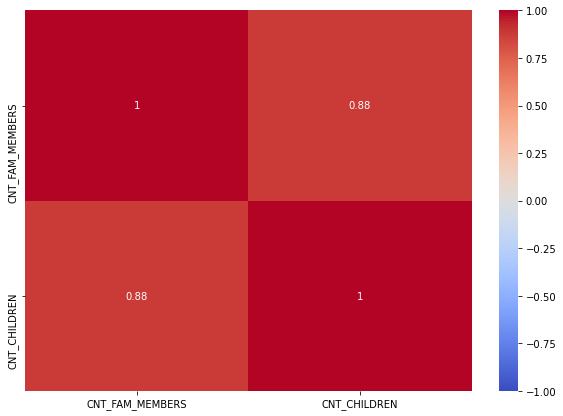

In [11]:
# Do we need the number of children and family members?
# Plotting a corelation matrix for the family and children columns 
Fam = df[["CNT_FAM_MEMBERS","CNT_CHILDREN"]]
sns.heatmap(Fam.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

In [12]:
# We see significant corelation that warrents column removal, so we will drop the count of family members column.
df.drop(["CNT_FAM_MEMBERS"],axis=1,inplace=True)

## Outlier Identification and Removal and Feature Correction

In [13]:
# Lets see some of the statistical measures of the data and get a sense for the distribution and if there are outliers
pd.set_option('display.max_columns', None)
df.describe()
pd.reset_option("max_columns")

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,2.052463,2.031521,0.015144,0.078173,1.422245,0.143421,-962.858788,0.006402,0.034362,0.267395,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,0.509034,0.502737,0.122126,0.268444,2.400989,0.446698,826.808487,0.083849,0.204685,0.916002,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,3.000000,3.000000,1.000000,1.000000,348.000000,34.000000,0.000000,4.000000,8.000000,27.000000,25.000000


In [14]:
#Exploring the children column
df.CNT_CHILDREN.value_counts()
# While it is definately possible to have 19 children, we will use domain knowledge and remove values of over 10 children
df.drop(df.CNT_CHILDREN[df.CNT_CHILDREN>=10].index,inplace=True,axis=0)
# After removing the outliers
print("After removing the children count outliers:")
df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

After removing the children count outliers:


0    215371
1     61119
2     26749
3      3717
4       429
5        84
6        21
7         7
8         2
9         2
Name: CNT_CHILDREN, dtype: int64

We reject 454 points
A z-score of 3 corresponds to a prob of 0.27%
Skewness before: 391.557070
Kurtosis before: 191782.788849


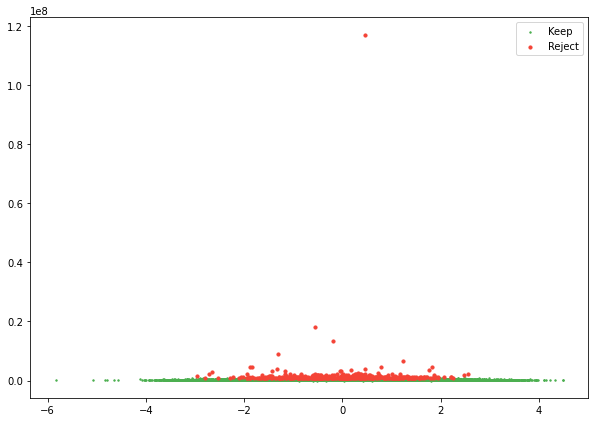

In [15]:
# We will now explore the income column and remove outliers
# Calculating mean and std for the income column
mean, std = np.mean(df.AMT_INCOME_TOTAL), np.std(df.AMT_INCOME_TOTAL)
# Calculating the z-score for each data point (how far in STDs is each data point from the mean).
z_score = np.abs((df.AMT_INCOME_TOTAL - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 3
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.AMT_INCOME_TOTAL.size)
plt.scatter(visual_scatter[keep], df.AMT_INCOME_TOTAL[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.AMT_INCOME_TOTAL[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# Print skewness and kurtosis
print(f"Skewness before: %f" % df.AMT_INCOME_TOTAL.skew())
print(f"Kurtosis before: %f" % df.AMT_INCOME_TOTAL.kurt())
# We will now drop the selected rejected  data points
df.drop(df.AMT_INCOME_TOTAL[~keep].index,inplace=True, axis=0)
plt.show();

We reject 294 points
A z-score of 6 corresponds to a prob of 0.000%
Skewness after: 1.717716
Kurtosis after: 4.870102


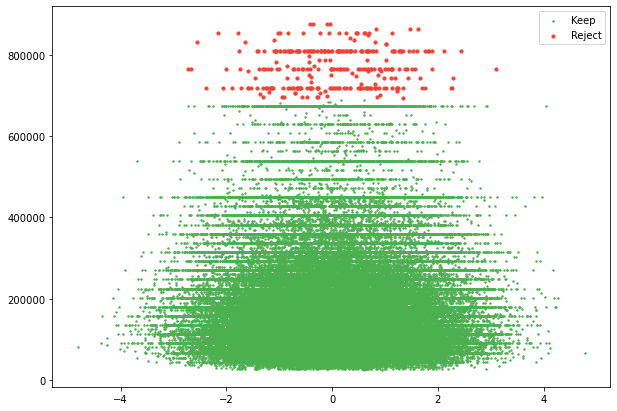

In [16]:
# Calculating mean and std for the income column
mean, std = np.mean(df.AMT_INCOME_TOTAL), np.std(df.AMT_INCOME_TOTAL)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.AMT_INCOME_TOTAL - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 6
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calculating the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 6 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.3f}%")
# Visualizing the outliers
visual_scatter = np.random.normal(size=df.AMT_INCOME_TOTAL.size)
plt.scatter(visual_scatter[keep], df.AMT_INCOME_TOTAL[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.AMT_INCOME_TOTAL[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# We will now drop the selected rejected  data points
df.drop(df.AMT_INCOME_TOTAL[~keep].index,inplace=True, axis=0)
# Print skewness and kurtosis after cleaning
print(f"Skewness after: %f" % df.AMT_INCOME_TOTAL.skew())
print(f"Kurtosis after: %f" % df.AMT_INCOME_TOTAL.kurt())
# We will not drop anymore values since this will cause significant dataset reduction
# People with very high anual incomes are less likely to default on a loan and may skew the model 
plt.show();

In [17]:
# Reengineer the DAYS_BIRTH column to show age of client in years.
df.DAYS_BIRTH = df.DAYS_BIRTH / -365
df.rename(columns={"DAYS_BIRTH":"AGE"},inplace=True)
# Makeing sure no values were corrupted.
len(df.AGE[df.AGE < 0])
df.AGE

0

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE, Length: 306753, dtype: float64

In [18]:
# Reengineer the DAYS_EMPLOYED column to show clients employment period in years.
df.DAYS_EMPLOYED = (np.abs(df.DAYS_EMPLOYED) / 365)
df.rename(columns={"DAYS_EMPLOYED":"YEARS_EMPLOYED"},inplace=True)
# Lets explore outliers and see how many rows are over 60 years of employment.
len(df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 60])
df.YEARS_EMPLOYED

55337

0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507    1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: YEARS_EMPLOYED, Length: 306753, dtype: float64

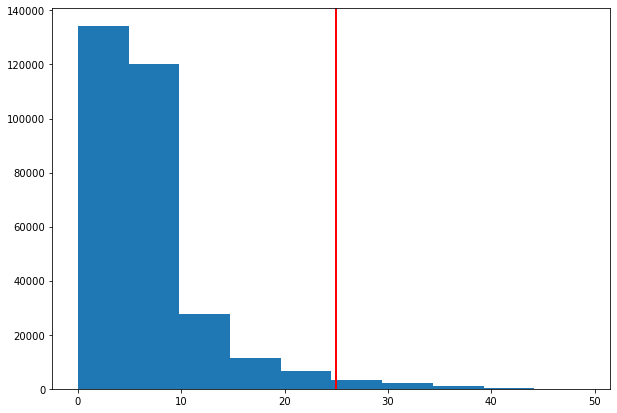

In [19]:
# We see thusands of rows with the employment period of 1000.665 years. Lets replace those with the median.
df.YEARS_EMPLOYED.loc[df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 1000].index] = df.YEARS_EMPLOYED.median()
# Plotting the distribution of the employment period column
plt.hist(df.YEARS_EMPLOYED)
plt.axvline(x=25,  linewidth=2, color='red')
# We will clean by inspection and remove data points of over 25 years employed
df.drop(df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 25].index,inplace=True, axis=0)
plt.show();

We reject 1835 points
A z-score of 7 corresponds to a prob of 0.0000573%
Skewness before: 12.334634
Kurtosis before: 1452.753848


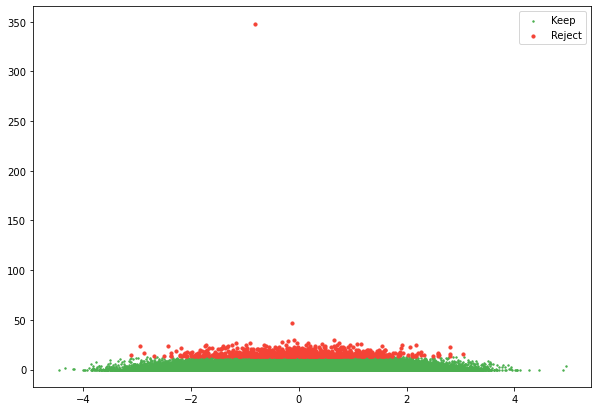

In [20]:
# Calculating mean and std for the SOCIAL_CIRCLE column
mean, std = np.mean(df.OBS_30_CNT_SOCIAL_CIRCLE), np.std(df.OBS_30_CNT_SOCIAL_CIRCLE)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.OBS_30_CNT_SOCIAL_CIRCLE - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 5
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 7 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.7f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.OBS_30_CNT_SOCIAL_CIRCLE.size)
plt.scatter(visual_scatter[keep], df.OBS_30_CNT_SOCIAL_CIRCLE[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.OBS_30_CNT_SOCIAL_CIRCLE[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# Print skewness and kurtosis
print(f"Skewness before: %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis before: %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.kurt())
# We will now drop the selected rejected  data points
df.drop(df.OBS_30_CNT_SOCIAL_CIRCLE[~keep].index,inplace=True, axis=0)
plt.show();

We reject 395 points
A z-score of 5 corresponds to a prob of 0.000057%
Skewness after (OBS): 2.042580
Kurtosis after (OBS): 4.389330
Skewness after (DEF): 3.829405
Kurtosis after (DEF): 18.680353


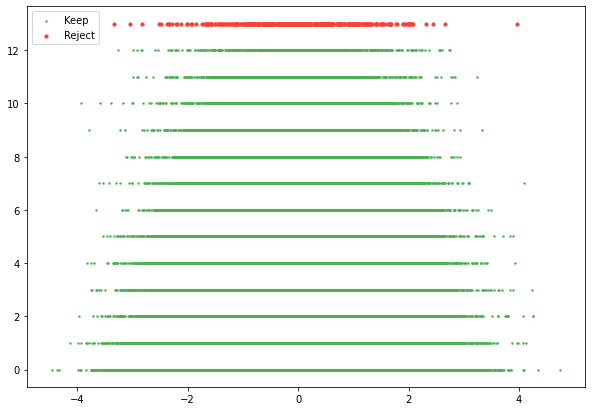

In [21]:
# Calculating mean and std for the SOCIAL_CIRCLE column
mean, std = np.mean(df.OBS_30_CNT_SOCIAL_CIRCLE), np.std(df.OBS_30_CNT_SOCIAL_CIRCLE)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.OBS_30_CNT_SOCIAL_CIRCLE - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 5
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 5 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.6f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.OBS_30_CNT_SOCIAL_CIRCLE.size)
plt.scatter(visual_scatter[keep], df.OBS_30_CNT_SOCIAL_CIRCLE[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.OBS_30_CNT_SOCIAL_CIRCLE[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# We will now drop the selected rejected  data points
df.drop(df.OBS_30_CNT_SOCIAL_CIRCLE[~keep].index,inplace=True, axis=0)
# Print skewness and kurtosis after cleaning. It is significantly better
print(f"Skewness after (OBS): %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis after (OBS): %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.kurt())
print(f"Skewness after (DEF): %f" % df.DEF_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis after (DEF): %f" % df.DEF_30_CNT_SOCIAL_CIRCLE.kurt())
plt.show();

In [22]:
# Reengineer the DAYS_LAST_PHONE_CHANGE column to show in days.
df.DAYS_LAST_PHONE_CHANGE = np.abs(df.DAYS_LAST_PHONE_CHANGE)
df.DAYS_LAST_PHONE_CHANGE

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 298220, dtype: float64

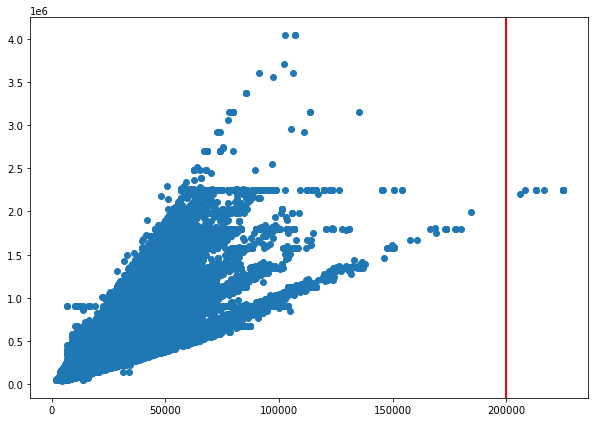

In [23]:
# We will plot the Amount Annuity and Amount Goods Price on a scatter plot to look for outliers
plt.scatter(df.AMT_ANNUITY,df.AMT_GOODS_PRICE)
# We see outliers on the Annuity column so we will clean that
plt.axvline(x=200000,  linewidth=2, color='red')
df.drop(df.AMT_ANNUITY[df.AMT_ANNUITY >= 200000].index,inplace=True, axis=0)
plt.show();

In [24]:
# Lets review the Credit Bureau columns for skewness and kurtosis
print(f"Skewness Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.skew())
print(f"Kurtosis Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.kurt())

print(f"Skewness Year: %f" % df.AMT_REQ_CREDIT_BUREAU_YEAR.skew())
print(f"Kurtosis Year: %f" % df.AMT_REQ_CREDIT_BUREAU_YEAR.kurt())

print(f"Skewness Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.skew())
print(f"Kurtosis Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.kurt())

print(f"Skewness Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.skew())
print(f"Kurtosis Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.kurt())
# Could be worse, but lets try to clean the Hour, Week, and Month columns

Skewness Month: 7.811854
Kurtosis Month: 90.832733
Skewness Year: 1.242077
Kurtosis Year: 1.969887
Skewness Hour: 14.560654
Kurtosis Hour: 255.707255
Skewness Week: 9.316798
Kurtosis Week: 167.999106


In [25]:
# Cleaning the Bureau columns by inspection
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

df.drop(df.AMT_REQ_CREDIT_BUREAU_HOUR[df.AMT_REQ_CREDIT_BUREAU_HOUR >=2].index,inplace=True, axis=0)
df.drop(df.AMT_REQ_CREDIT_BUREAU_WEEK[df.AMT_REQ_CREDIT_BUREAU_WEEK >=4].index,inplace=True, axis=0)
df.drop(df.AMT_REQ_CREDIT_BUREAU_MON[df.AMT_REQ_CREDIT_BUREAU_MON >=14].index,inplace=True, axis=0)

0.0    256025
1.0      1512
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

0.0    249306
1.0      7978
2.0       195
3.0        54
4.0        34
6.0        20
5.0         9
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

0.0     215277
1.0      32143
2.0       5196
3.0       1905
4.0       1024
5.0        571
6.0        324
7.0        284
9.0        201
8.0        180
10.0       128
11.0       115
12.0        72
13.0        65
14.0        38
15.0        34
16.0        22
17.0        12
18.0         6
19.0         2
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [26]:
# Lets review the Credit Bureau columns for skewness and kurtosis after our data cleaning
print(f"Skewness Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.skew())
print(f"Kurtosis Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.kurt())

print(f"Skewness Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.skew())
print(f"Kurtosis Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.kurt())

print(f"Skewness Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.skew())
print(f"Kurtosis Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.kurt())
# Alright, that is a bit better. Its all about the comprise to maintain dataset size

Skewness Month: 6.816562
Kurtosis Month: 66.090643
Skewness Hour: 12.939770
Kurtosis Hour: 165.438941
Skewness Week: 6.040049
Kurtosis Week: 42.146439


In [27]:
# Reengineer the gender column
df.CODE_GENDER.value_counts()
# Replace the null values with the mode
df.CODE_GENDER[df.CODE_GENDER == "XNA"] = "F"
# Converting F and M to 0 and 1
df.CODE_GENDER.replace({"M": "0", "F": "1"}, inplace=True)
# Convert numeric columns to the appropriate Dtype
df.CODE_GENDER = df.CODE_GENDER.apply(pd.to_numeric, errors='ignore')
# Confirming the changes
df.CODE_GENDER.value_counts()
print(f"The Gender column Dtype is: {df.CODE_GENDER.dtypes}")

F      195413
M      102535
XNA         3
Name: CODE_GENDER, dtype: int64

1    195416
0    102535
Name: CODE_GENDER, dtype: int64

The Gender column Dtype is: int64


In [28]:
# Reengineer and convert binary strings in Own Real Estate, Contract Type, and Own Car to binary integers of 0 and 1
df.FLAG_OWN_CAR.replace({"N": 0, "Y": 1}, inplace=True)
df.FLAG_OWN_REALTY.replace({"N": 0, "Y": 1}, inplace=True)
df.NAME_CONTRACT_TYPE.replace({"Cash loans":0,"Revolving loans":1},inplace=True)
# Convert numeric columns to the appropriate Dtype
df.FLAG_OWN_REALTY = df.FLAG_OWN_CAR.apply(pd.to_numeric, errors='ignore')
df.FLAG_OWN_CAR = df.FLAG_OWN_REALTY.apply(pd.to_numeric, errors='ignore')
df.NAME_CONTRACT_TYPE = df.FLAG_OWN_REALTY.apply(pd.to_numeric, errors='ignore')
# Confirming changes
df.FLAG_OWN_REALTY.value_counts()
df.FLAG_OWN_CAR.value_counts()
df.NAME_CONTRACT_TYPE.value_counts()
print(f"The Own Realty column Dtype is: {df.FLAG_OWN_REALTY.dtypes}")
print(f"The Own Car column Dtype is: {df.FLAG_OWN_CAR.dtypes}")
print(f"The Contract Type column Dtype is: {df.NAME_CONTRACT_TYPE.dtypes}")

0    196312
1    101639
Name: FLAG_OWN_REALTY, dtype: int64

0    196312
1    101639
Name: FLAG_OWN_CAR, dtype: int64

0    196312
1    101639
Name: NAME_CONTRACT_TYPE, dtype: int64

The Own Realty column Dtype is: int64
The Own Car column Dtype is: int64
The Contract Type column Dtype is: int64


In [29]:
# Now lets see how we are doing for general distribution and outliers
pd.set_option('display.max_columns', None)
df.describe()
pd.reset_option("max_columns")
# That is so much better

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,2.979510e+05,297939.000000,2.976810e+05,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297951.000000,297950.000000,257349.000000,257349.000000,257349.000000,257349.000000
mean,0.081889,0.341127,0.655866,0.341127,0.341127,0.423009,165909.394581,5.963340e+05,27016.912650,5.356417e+05,0.020817,43.735603,5.938761,2.054053,2.033079,0.015385,0.079849,1.364305,0.142107,960.185494,0.005868,0.033122,0.258843,1.903062
std,0.274196,0.474089,0.475086,0.474089,0.474089,0.722109,85436.002355,3.995488e+05,14212.829124,3.663521e+05,0.013787,11.974876,4.626738,0.508628,0.502412,0.123079,0.271059,2.130096,0.438644,825.474376,0.076375,0.186547,0.847621,1.869234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112500.000000,2.700000e+05,16515.000000,2.385000e+05,0.010006,33.797260,2.504110,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,273.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,144000.000000,5.120640e+05,24880.500000,4.500000e+05,0.018850,42.756164,5.865753,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,754.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,202500.000000,8.086500e+05,34587.000000,6.795000e+05,0.028663,53.736986,7.205479,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1566.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,690399.000000,4.050000e+06,184477.500000,4.050000e+06,0.072508,69.043836,25.000000,3.000000,3.000000,1.000000,1.000000,12.000000,6.000000,4292.000000,1.000000,3.000000,13.000000,25.000000


## Removing Null Values

In [30]:
# This is the dataset shape now
df.shape
# We will look at the remaining columns and the percentage of Null records in them
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(15)

(297951, 30)

OCCUPATION_TYPE                31.664603
AMT_REQ_CREDIT_BUREAU_YEAR     13.627073
AMT_REQ_CREDIT_BUREAU_MON      13.627073
AMT_REQ_CREDIT_BUREAU_WEEK     13.627073
AMT_REQ_CREDIT_BUREAU_HOUR     13.627073
AMT_GOODS_PRICE                 0.090619
AMT_ANNUITY                     0.004028
DAYS_LAST_PHONE_CHANGE          0.000336
YEARS_EMPLOYED                  0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
dtype: float64

# 
We see that 31% of the occupation_type is null. There is no reasonable way to impute this without creating significant distortions. Several plausable imputations can be thought of, but are too risky. Therefore, we will fill the null values with "unknown," since the nulls may be unemployed, pensioners, or just errors. 

In [31]:
# Filling the null values in the occupation_type column
df["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)

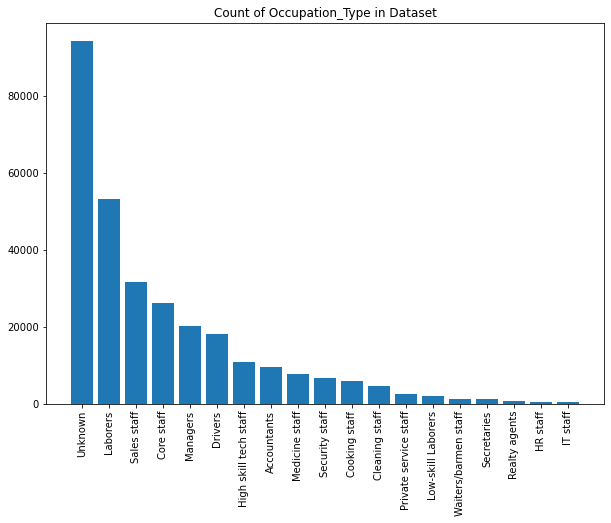

In [32]:
# So let us now visualize and explore the OCCUPATION_TYPE column
occupationCount = df.OCCUPATION_TYPE.value_counts()
occupationCount = occupationCount.to_frame().reset_index()
occupationCount.rename(columns={"index":"OCCUPATION_TYPE","OCCUPATION_TYPE":"VALUE_COUNTS"})

plt.bar(occupationCount.iloc[:,0],occupationCount.iloc[:,1])
plt.xticks(rotation=90)
plt.title("Count of Occupation_Type in Dataset")
plt.show();

In [33]:
# We will now look at the rest of the top columns with null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    13.627073
AMT_REQ_CREDIT_BUREAU_MON     13.627073
AMT_REQ_CREDIT_BUREAU_WEEK    13.627073
AMT_REQ_CREDIT_BUREAU_HOUR    13.627073
AMT_GOODS_PRICE                0.090619
AMT_ANNUITY                    0.004028
DAYS_LAST_PHONE_CHANGE         0.000336
YEARS_EMPLOYED                 0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
dtype: float64

#
As we can see, the 6 AMT_REQ_CREDIT_BUREAU columns which list the number of enquiries to the Credit Bureau about the client, X time before the application, all have the same percentage of values as null. We will therefore look at the values and their count in these columns and see if we can get a better understanding.

In [34]:
# Looking at values and their count in the AMT_REQ_CREDIT_BUREAU coulmns
# Note that all columns had 0 as the most common value. (Commented out for sapce)

df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    255839
1.0      1510
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

0.0     69202
1.0     61384
2.0     48616
3.0     32648
4.0     20072
5.0     11652
6.0      6774
7.0      3739
8.0      2066
9.0      1062
11.0       30
12.0       29
13.0       19
10.0       19
14.0       10
17.0        7
15.0        5
19.0        4
18.0        4
16.0        2
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

#
Zero is the most common value in all columns. This means that the person has not had a credit check in the last period and that this lending institution is likely the first place the person is going to for a loan. Because it is the mode, and since sometimes null is conflated with zero in datasets, we will fill all these null values with zero.

In [35]:
# Filling the null values in the AMT_REQ_CREDIT_BUREAU columns
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)

In [36]:
# We will now look again at the top columns with Null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

AMT_GOODS_PRICE               0.090619
AMT_ANNUITY                   0.004028
DAYS_LAST_PHONE_CHANGE        0.000336
TARGET                        0.000000
YEARS_EMPLOYED                0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
DEF_30_CNT_SOCIAL_CIRCLE      0.000000
OBS_30_CNT_SOCIAL_CIRCLE      0.000000
dtype: float64

#
We see that the highest percentage of null values is 0.09% of null values. While statistical imputation methods could be applied to eliminate the null values, this would require further exploration for each column. Since we have more than enough records in this dataset for our purposes, we will just drop all records with null values for the remaining columns with minimal effect on the dataset size.

In [37]:
# Taking initial dataset shape before removing null records
before = df.shape
# Removing null records from dataset
df.dropna(axis=0, how='any',inplace=True)
# Taking dataset shape after removing null records to determine how much was lost
after = df.shape
# Calculating and printing how many records were dropped
lost = (before[0])-(after[0])
print(f"We droped {lost} records from the dataset and our new dataset shape is: {after}")

We droped 283 records from the dataset and our new dataset shape is: (297668, 30)


In [38]:
# Now we take a look at the remaining columns, their Dtype, and see that there are no more Null values 
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297668 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       297668 non-null  int64  
 1   NAME_CONTRACT_TYPE           297668 non-null  int64  
 2   CODE_GENDER                  297668 non-null  int64  
 3   FLAG_OWN_CAR                 297668 non-null  int64  
 4   FLAG_OWN_REALTY              297668 non-null  int64  
 5   CNT_CHILDREN                 297668 non-null  int64  
 6   AMT_INCOME_TOTAL             297668 non-null  float64
 7   AMT_CREDIT                   297668 non-null  float64
 8   AMT_ANNUITY                  297668 non-null  float64
 9   AMT_GOODS_PRICE              297668 non-null  float64
 10  NAME_INCOME_TYPE             297668 non-null  object 
 11  NAME_EDUCATION_TYPE          297668 non-null  object 
 12  NAME_FAMILY_STATUS           297668 non-null  object 
 13 

# EDA

Number of clients who defualted on the loan: 24378
Number of clients who did not defualt on the loan: 273290


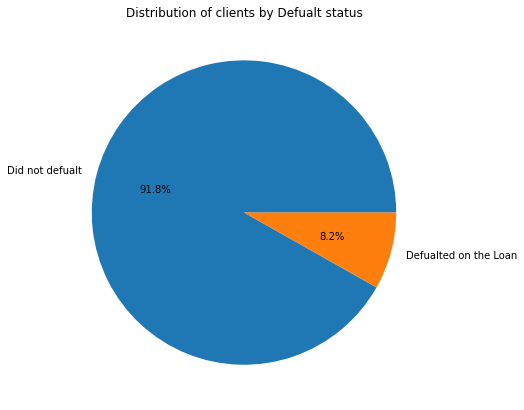

In [39]:
# Spliting up the dataset based on if the client defualted on the loan or not
dfDefualt = df[df.TARGET == 1]
dfNoDefualt = df[df.TARGET == 0]
print(f"Number of clients who defualted on the loan: {dfDefualt.TARGET.count()}")
print(f"Number of clients who did not defualt on the loan: {dfNoDefualt.TARGET.count()}")
plt.pie(df.TARGET.value_counts(), autopct='%1.1f%%', labels = ["Did not defualt","Defualted on the Loan"])
plt.title("Distribution of clients by Defualt status")
# We see significant imbalances in the data. We will take care of this when building the model. 
plt.show();

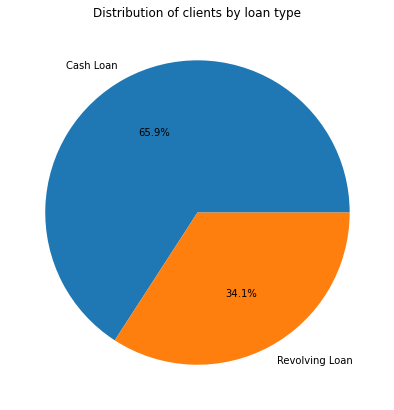

In [40]:
# Plot the composition of revolving loans (credit lines) to cash loans
plt.pie(
    df.NAME_CONTRACT_TYPE.value_counts(), autopct='%1.1f%%', labels = ["Cash Loan","Revolving Loan"])
plt.title("Distribution of clients by loan type")
plt.show();

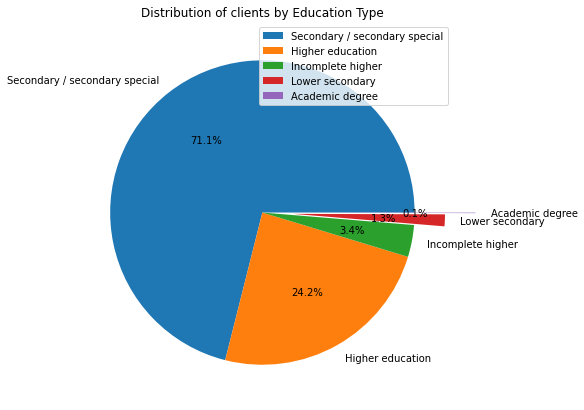

In [41]:
# Look at distribution of clients by education type
plt.pie(
    df.NAME_EDUCATION_TYPE.value_counts(),labels = df.NAME_EDUCATION_TYPE.unique(),
    explode=[0,0,0,0.2,0.4],autopct='%1.1f%%')
plt.legend()
plt.title("Distribution of clients by Education Type")
plt.show();

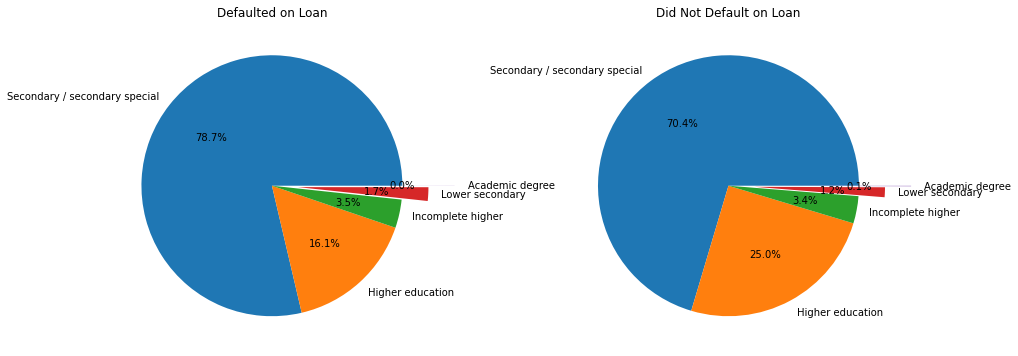

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))   
ax1.pie(
    dfDefualt.NAME_EDUCATION_TYPE.value_counts(),labels = df.NAME_EDUCATION_TYPE.unique(),
    explode=[0,0,0,0.2,0.4],autopct='%1.1f%%')
ax2.pie(
    dfNoDefualt.NAME_EDUCATION_TYPE.value_counts(),explode=[0,0,0,0.2,0.4], 
    autopct='%1.1f%%', labels = df.NAME_EDUCATION_TYPE.unique())
ax1.set_title('Defaulted on Loan')
ax2.set_title('Did Not Default on Loan')
plt.show();

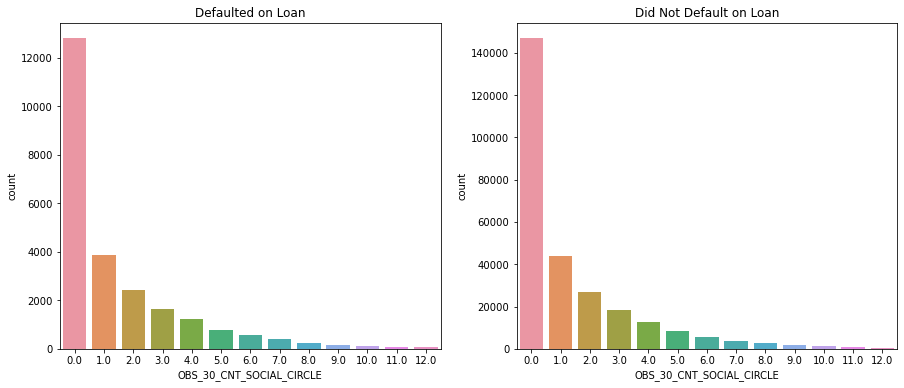

In [43]:
# Plotting social circle of clients and if they defaulted.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(dfDefualt.OBS_30_CNT_SOCIAL_CIRCLE,ax=ax1,label='default')
sns.countplot(dfNoDefualt.OBS_30_CNT_SOCIAL_CIRCLE,ax=ax2,label='no default')
ax1.set_title('Defaulted on Loan')
ax2.set_title('Did Not Default on Loan')
plt.show();

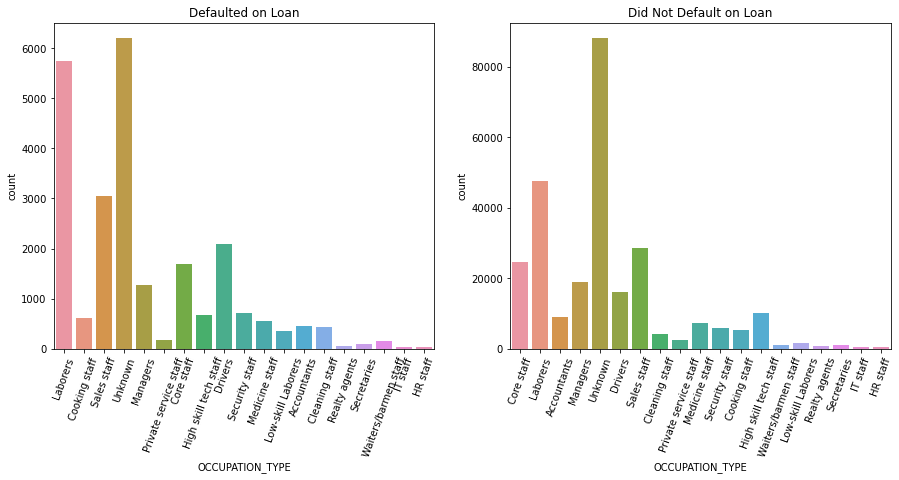

In [44]:
# Plotting occupation type and if the client defaulted or not.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(dfDefualt.OCCUPATION_TYPE,ax=ax1,label='default')
sns.countplot(dfNoDefualt.OCCUPATION_TYPE,ax=ax2,label='no default')
ax1.set_title('Defaulted on Loan')
ax2.set_title('Did Not Default on Loan')
ax1.tick_params(rotation=70,axis='x')
ax2.tick_params(rotation=70,axis='x')
plt.show();

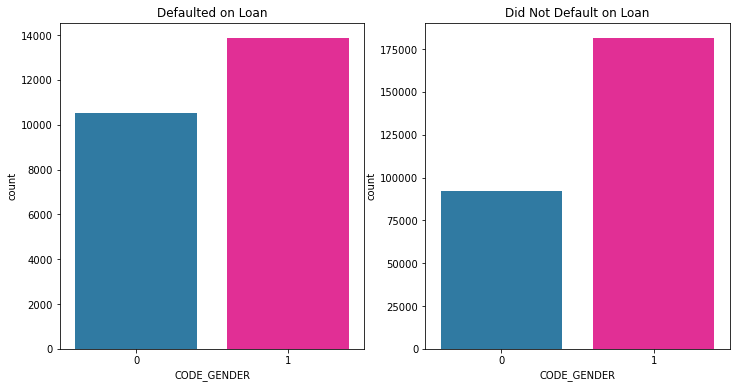

In [45]:
# Plot defualters and non-defualters based on gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(dfDefualt.CODE_GENDER, ax=ax1,palette=['#1d80b5',"#F19"])
sns.countplot(dfNoDefualt.CODE_GENDER, ax=ax2,palette=['#1d80b5',"#F19"])
ax1.set_title('Defaulted on Loan')
ax2.set_title('Did Not Default on Loan')
plt.show();

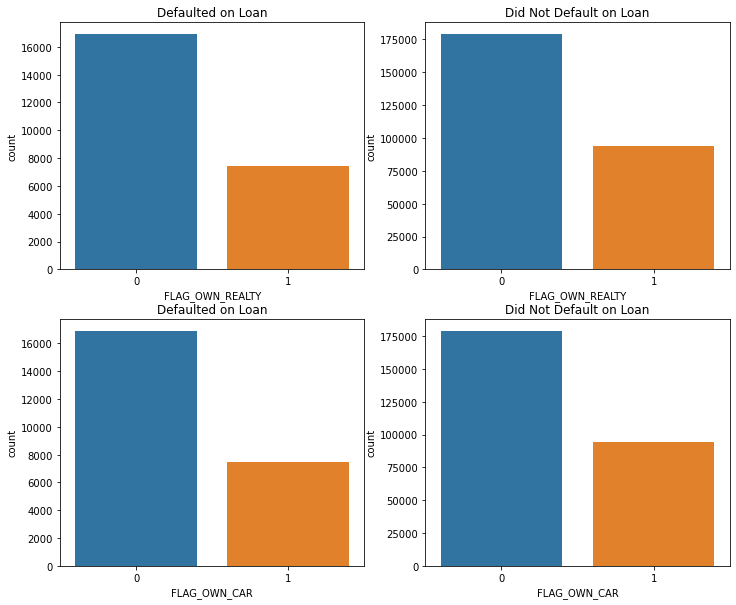

In [46]:
# Plot defualters and non-defualters and weather they owned Real Estate or not or Car or not
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
sns.countplot(dfDefualt.FLAG_OWN_REALTY, ax=ax1)
sns.countplot(dfNoDefualt.FLAG_OWN_REALTY, ax=ax2)
sns.countplot(dfDefualt.FLAG_OWN_CAR, ax=ax3)
sns.countplot(dfNoDefualt.FLAG_OWN_CAR, ax=ax4)
ax1.set_title('Defaulted on Loan')
ax2.set_title('Did Not Default on Loan')
ax3.set_title('Defaulted on Loan')
ax4.set_title('Did Not Default on Loan')
plt.show();
# We can see that there are proportionally less people who own real estate in this dataset
# We see people are slightly less likely to own real estate or a car for those who default

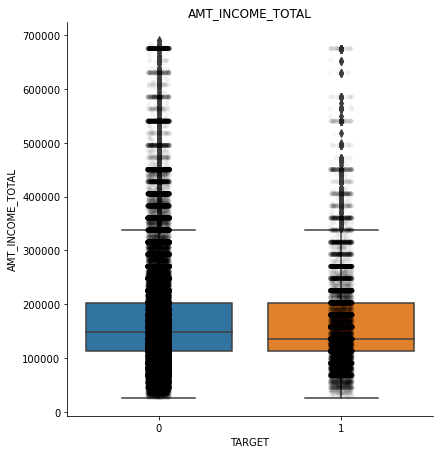

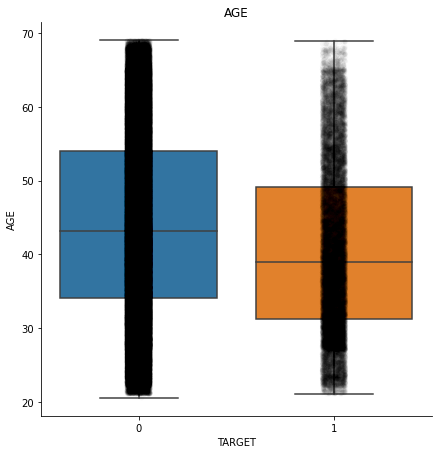

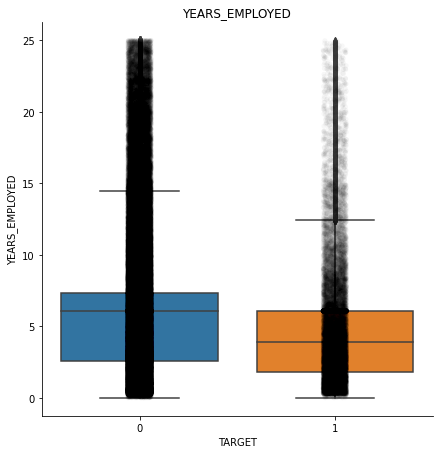

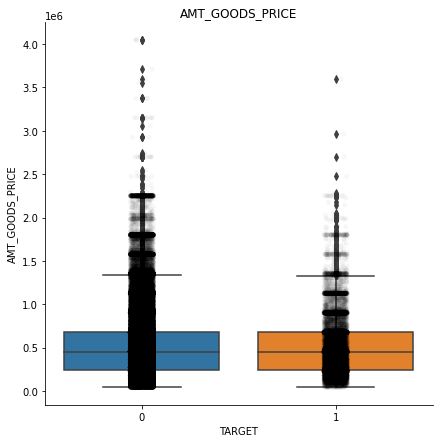

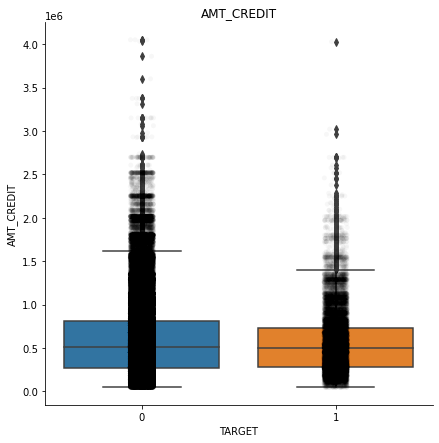

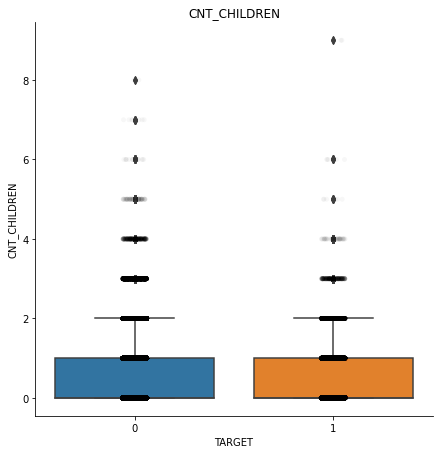

In [47]:
# Plot the Years Employed and the target outcomes
# We can see that those who default have a shorter employment period on average

# Plot the income and the target outcomes
# We can see that those who default have slightly lower incomes on average

# Plot the Age and the target outcomes
# We can see that those who default are younger on average

# Plotting continues variables and the target outcomes
vars_to_plot = ["AMT_INCOME_TOTAL","AGE","YEARS_EMPLOYED","AMT_GOODS_PRICE","AMT_CREDIT","CNT_CHILDREN"]
for i in vars_to_plot:
    # Plotting a catplot
    sns.catplot(x = "TARGET", y = i, data=df, kind="box",height=6)
    plt.title(i)
    # Showing concentration of data points with stripplot
    sns.stripplot(x = "TARGET", y = i, data=df, jitter=0.06, alpha=0.03, color='k')
plt.show();

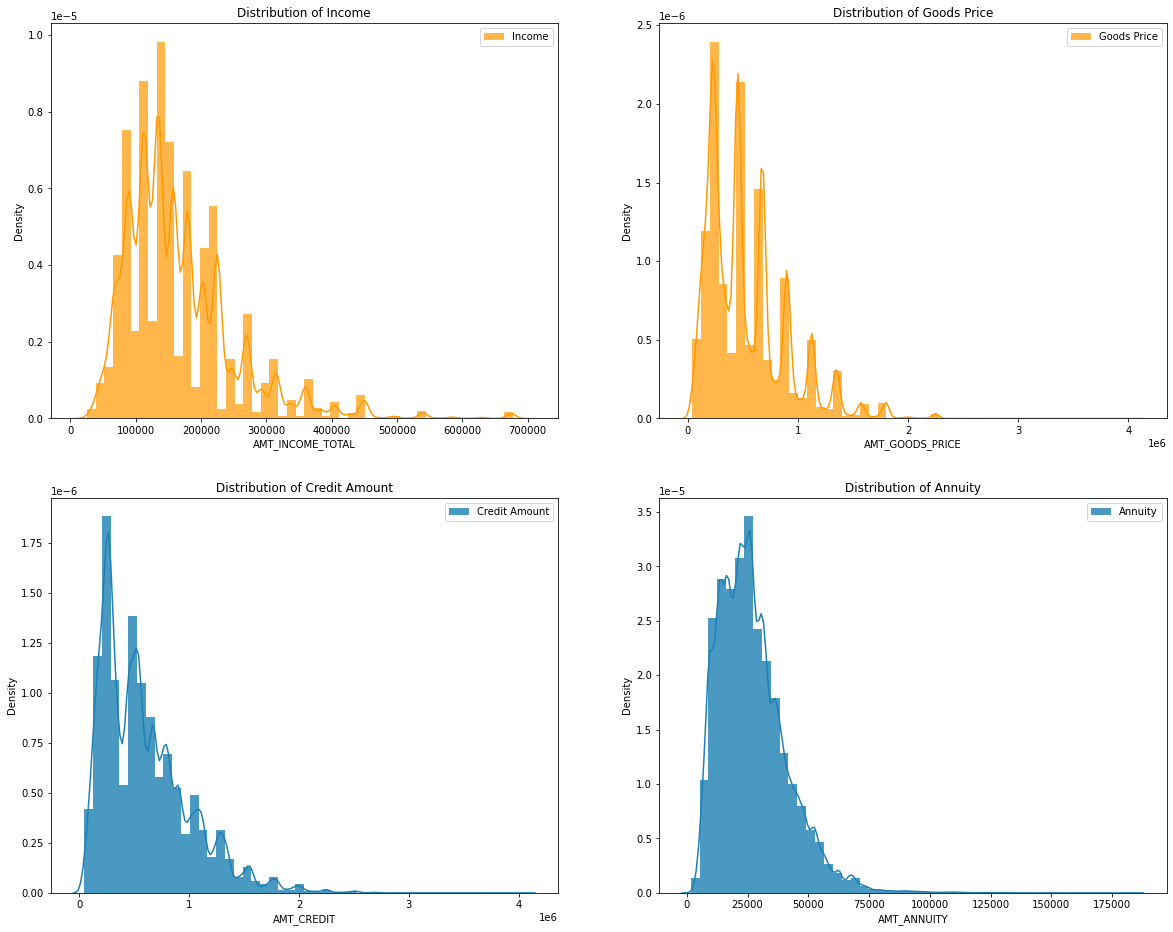

In [48]:
# Plotting distributions of various continuous variables 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,16))
sns.distplot(df.AMT_INCOME_TOTAL, color="#FF9900",hist_kws=dict(alpha=0.7),label="Income",ax=ax1)
sns.distplot(df.AMT_GOODS_PRICE, color="#FF9900",hist_kws=dict(alpha=0.7),label="Goods Price", ax=ax2)
sns.distplot(df.AMT_CREDIT,color="#1d80b5",hist_kws=dict(alpha=0.8),label="Credit Amount", ax=ax3)
sns.distplot(df.AMT_ANNUITY,color="#1d80b5",hist_kws=dict(alpha=0.8),label="Annuity", ax=ax4)
ax1.set_title('Distribution of Income')
ax2.set_title('Distribution of Goods Price')
ax3.set_title('Distribution of Credit Amount')
ax4.set_title('Distribution of Annuity')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show();

In [49]:
# # Check the correlation between all variables
# # There are some highly correlated variables
# plt.figure(figsize=(30, 25))
# sns.heatmap(df.loc[:,num].corr(), vmin=-1, cmap='coolwarm', annot=True)
# plt.show();

# Machine Learning

## Model preperation

In [50]:
# Create a list of all the Catagorical features and a list of all the numerical/ features
cat = list(df.select_dtypes(["object"]).columns)
num = list(df.select_dtypes(["float64","int64"]).columns)
print(f"Number of numerical columns: {len(num)}")
print(f"Number of categorical columns: {len(cat)}")

Number of numerical columns: 24
Number of categorical columns: 6


In [51]:
# One Hot Encode the categorical features and drop extra dummy variables
df = pd.get_dummies(df, columns=cat, drop_first=True)
print(f"The dataset shape after OneHotEncoding is: {df.shape}")

The dataset shape after OneHotEncoding is: (297668, 68)


In [52]:
# Defining our variables for the model
X = df.iloc[:,1:] # independent variables
y = df.iloc[:,0] # Dependent variable/taget
X.head()
y

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,1,0,0


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 297668, dtype: int64

#### Feature Scaling
# 
While some ML models do not require feature scaling, models such as SVM and KNN, which rely on taking distance into account, or Deep Learning ANNs are significantly affected by unscaled data. So for the purposes of model comparison and performance, we will standardize the data with the following formula: z = (x - u) / s (u is mean, s is standard deviation).

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting the Dataset and Stratifying

In [54]:
# Splitting the dataset into Test/Train and defining model variables , stratify=y
# We will split 75% for train and 25% for test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 1,shuffle=True, stratify=y)

#### Handling Imbalanced Data

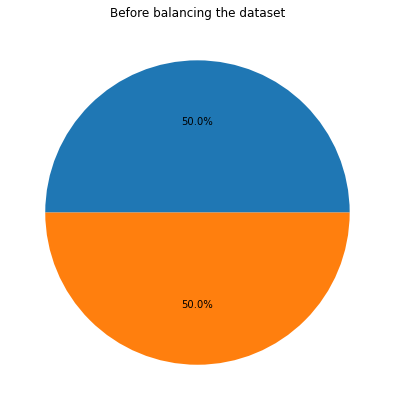

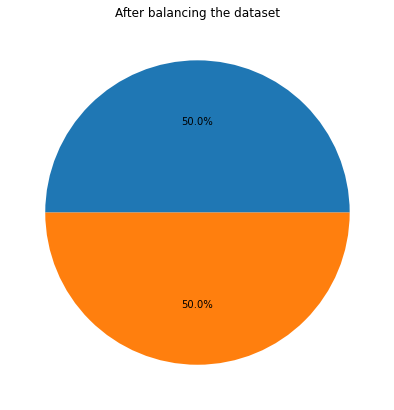

In [56]:
# Target variable proportions before synthetic resampling 
plt.pie(y_train.value_counts(),autopct='%1.1f%%')
plt.title('Before balancing the dataset')
plt.show();
# Oversampling to deal with the imbalance in the target data
from imblearn.over_sampling import SMOTE
oversample = SMOTE(n_jobs=4)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# Target variable proportions after synthetic resampling 
plt.pie(y_train.value_counts(),autopct='%1.1f%%')
plt.title('After balancing the dataset')
plt.show();

#### Fitting the Models

In [56]:
# Import the necessary libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer,accuracy_score


# Create a list of the classifiers to be tested with the dataset
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['LogisticRegression:', LogisticRegression()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGBoost:', XGBClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cv_score = cross_val_score(classifier, X_test, y_test, cv=8)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df.to_csv('Classifier_Scores.csv', index=False)
metrics_df

DecisionTreeClassifier()

RandomForestClassifier()

GaussianNB()

KNeighborsClassifier()

LogisticRegression()

AdaBoostClassifier()

GradientBoostingClassifier()

[15:53:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[15:54:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Classifier,Accuracy,CV Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.822958,0.842426,0.109595,0.163043,0.131080
0,RandomForest,0.913562,0.918148,0.203947,0.019073,0.034884
0,Naive Bayes,0.233766,0.087966,0.089014,0.904840,0.162084
0,KNeighbours,0.670071,0.912285,0.100011,0.378589,0.158224
0,LogisticRegression,0.626382,0.918097,0.128323,0.614848,0.212330
0,AdaBoostClassifier,0.816827,0.918097,0.141600,0.244258,0.179273
0,GradientBoostingClassifier,0.915326,0.917996,0.225914,0.013946,0.026270
0,XGBoost,0.917509,0.916989,0.330097,0.006973,0.013657


In [81]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(max_iter=200,n_jobs=6)
LogisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=6)

In [82]:
# Predicting with the model
y_pred = LogisticRegression.predict(X_test)
# Evaluating the model
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.617104183757178

0.21289843280149998

0.626280780730339

[[34276 20382]
 [ 1867  3009]]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=200,max_depth=4)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [84]:
# Predicting with the model
y_pred = GBC.predict(X_test)
# Evaluating the model
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.00881870385561936

0.017148554336989034

0.9172069741660228

[[54562    96]
 [ 4833    43]]


In [106]:
from sklearn.model_selection import cross_validate
scores = cross_validate(LogisticRegression,X_test,y_test,cv=10,scoring='accuracy')
scores

{'fit_time': array([0.35, 0.35, 0.35, 0.28, 0.35, 0.32, 0.33, 0.34, 0.38, 0.34]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92])}

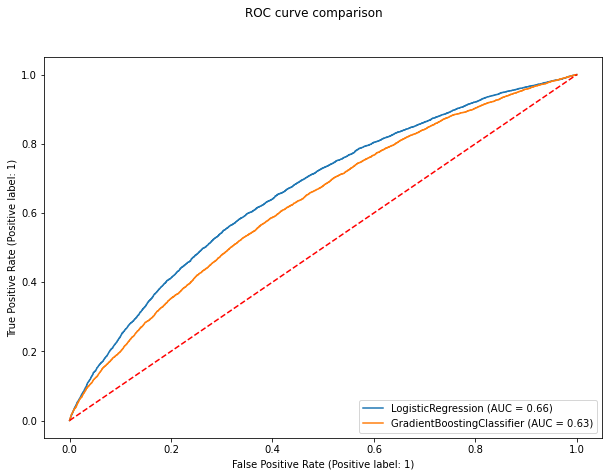

In [85]:
# ROC_AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds

# ROC_AUC plot
from sklearn.metrics import plot_roc_curve

LR = plot_roc_curve(LogisticRegression, X_test, y_test) 
GB = plot_roc_curve(GBC, X_test, y_test, ax=LR.ax_)
#xgbc = plot_roc_curve(xgb, X_test, y_test)#, ax=dt.ax_)
# lgbc = plot_roc_curve(lgb, X_test, y_test, ax=xgbc.ax_)
# gbc = plot_roc_curve(gb, X_test, y_test, ax=lgbc.ax_)

plt.plot([0, 1], [0, 1],'r--')
LR.figure_.suptitle("ROC curve comparison")
plt.show();

#### Building a Neural Network Classification


In [57]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [58]:
ann.add(tf.keras.layers.Dense(units=20, activation="relu"))

In [59]:
ann.add(tf.keras.layers.Dense(units=20, activation="relu"))

In [60]:
#ann.add(tf.keras.layers.Dense(units=20, activation="relu"))

In [61]:
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [62]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["FalseNegatives","accuracy"])#"accuracy"

In [63]:
model  = ann.fit(X_train, y_train, batch_size=30, epochs=60)

Epoch 1/60
14576/14576 [==============================] - 10s 633us/step - loss: 0.6129 - false_negatives: 72988.0000 - accuracy: 0.6630
Epoch 2/60
14576/14576 [==============================] - 10s 687us/step - loss: 0.5831 - false_negatives: 66358.0000 - accuracy: 0.6918
Epoch 3/60
14576/14576 [==============================] - 11s 775us/step - loss: 0.5596 - false_negatives: 65376.0000 - accuracy: 0.7074
Epoch 4/60
14576/14576 [==============================] - 11s 773us/step - loss: 0.5467 - false_negatives: 64100.0000 - accuracy: 0.7156
Epoch 5/60
14576/14576 [==============================] - 11s 783us/step - loss: 0.5396 - false_negatives: 63001.0000 - accuracy: 0.7215
Epoch 6/60
14576/14576 [==============================] - 11s 780us/step - loss: 0.5342 - false_negatives: 62506.0000 - accuracy: 0.7247
Epoch 7/60
14576/14576 [==============================] - 11s 789us/step - loss: 0.5267 - false_negatives: 61457.0000 - accuracy: 0.7301
Epoch 8/60
14576/14576 [=================

In [64]:
# Predicting with the ANN
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5

In [66]:
# Evaluating the ANN using standard metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer,accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
precision_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

[[48526  6132]
 [ 3786  1090]]


0.2235438884331419

0.18019507356587863

0.1509277208529493

0.8334061208721067

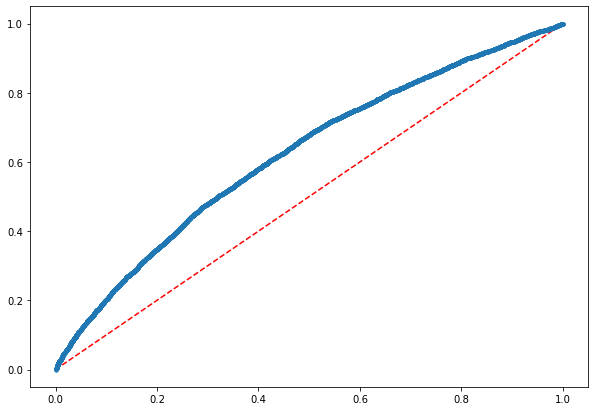

In [67]:
# Plotting an ROC curve for the ANN
from sklearn.metrics import roc_curve, auc

plt.plot([0, 1], [0, 1],'r--')
y_pred = ann.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.show();

In [68]:
# scores = cross_validate(ann,X_test,y_test,cv=6,scoring='recall')
# scores

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer,accuracy_score

tf.config.list_physical_devices('GPU')# to confirm that TensorFlow is using the GPU.
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


[]

Num GPUs Available:  0
